In [30]:
import numpy as np
import matplotlib.pyplot as plt


In [31]:
layers = np.load("peeledlayers.npy")
print(layers.shape)

(16, 300, 200)


In [32]:
orderedlayers = np.concatenate([layers[0::4], np.flip(layers[1::4], 0), layers[2::4], np.flip(layers[3::4], 0)], axis=0)

zfar = np.min(orderedlayers)


In [33]:
abovezfar = orderedlayers > zfar+1
orderedlayers[~abovezfar] = np.min(orderedlayers[abovezfar])
orderedlayers

array([[[-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        ...,
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366]],

       [[-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        ...,
        [-926.50366, -926.50366, -926.50366, ..., -926.50366,
         -926.50366, -926.50366],
        [-92

-487.8176


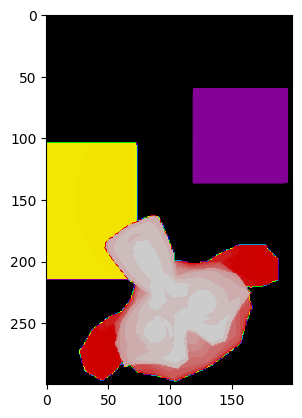

-492.00497


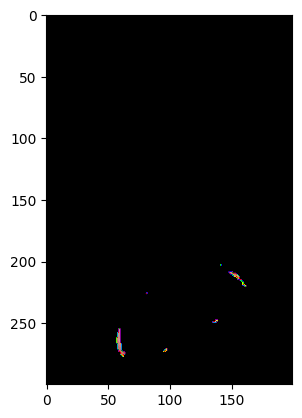

-926.50366


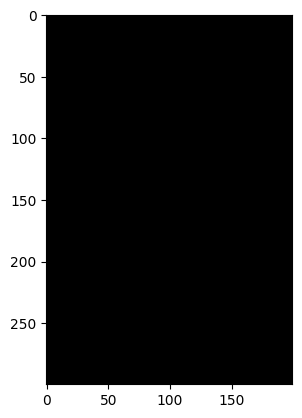

-926.50366


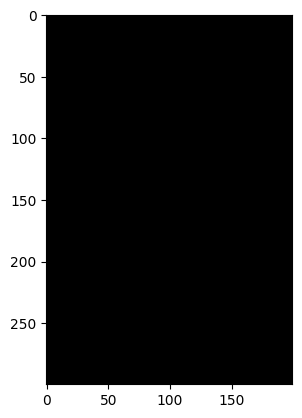

-926.50366


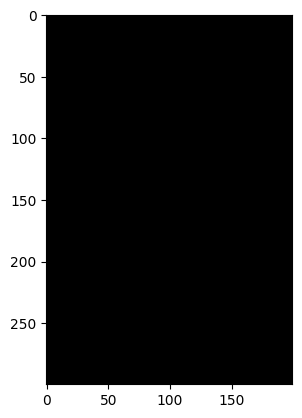

-926.50366


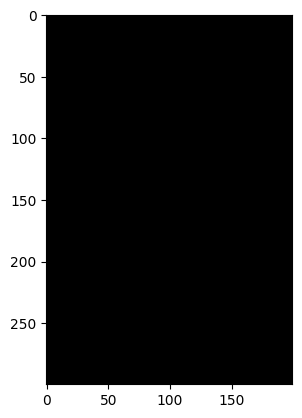

506.3627


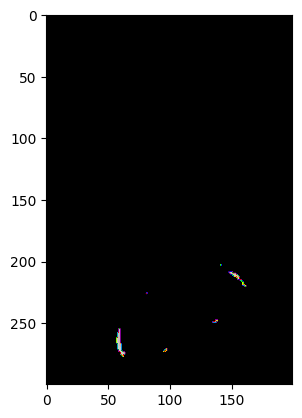

920.1403


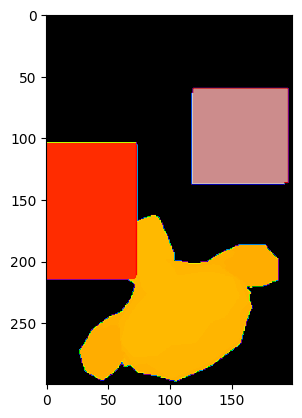

-488.19415


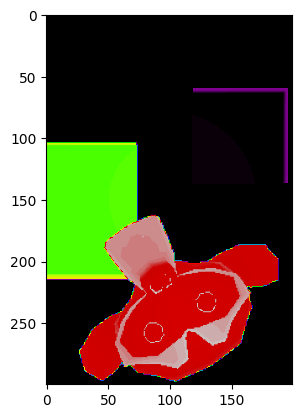

-488.19415


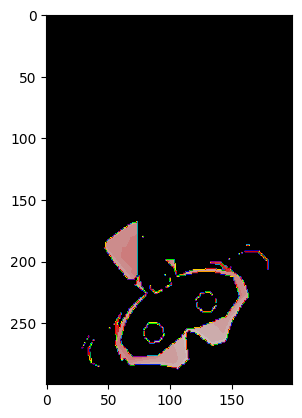

-926.50366


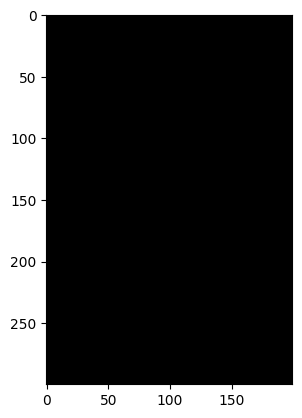

-926.50366


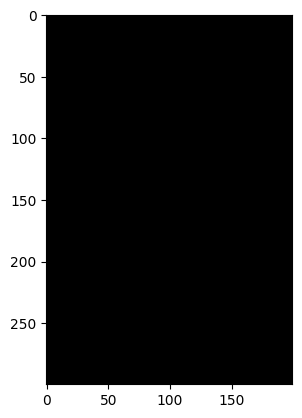

-926.50366


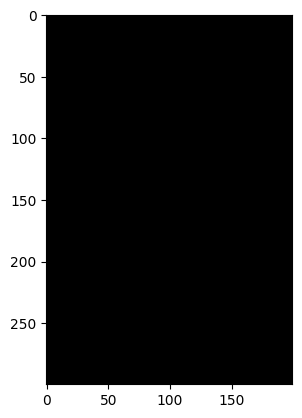

-926.50366


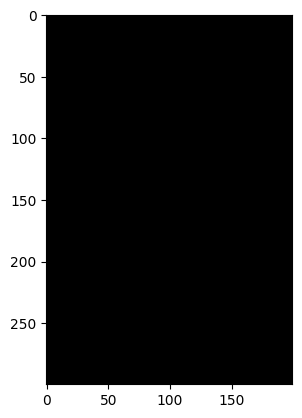

515.6558


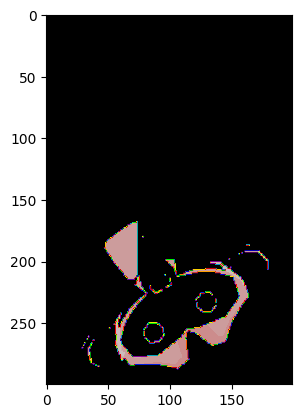

926.50366


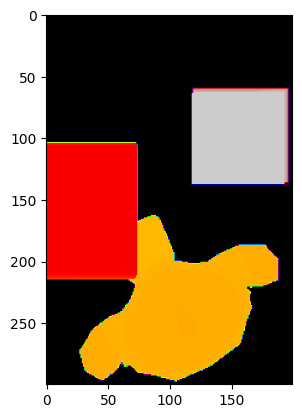

In [36]:
for i in range(orderedlayers.shape[0]):
    im = orderedlayers[i]
    print(im.max())
    plt.imshow(im, cmap="nipy_spectral")
    plt.show()